
... ***CURRENTLY UNDER DEVELOPMENT*** ...


# Compare HyCReeW-Q results from hourly waves and from hydrographs
## Validation of the methodology to be used in the climate emulator

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

from teslakit.database import Database


In [2]:

p_data = r'/Users/albacid/Projects/TeslaKit_projects'
db = Database(p_data)

# set site
db.SetSite('KWAJALEIN')

# --------------------------------------
# N, S, E profiles
pN = 28 #(36,22)
pS = 8  #(13,1)
pE = 16 #(21,14)

In [3]:
hist_Q_storms_N = xr.open_dataset(op.join(p_data, 'sites/KWAJALEIN_05/HYCREWW/hist_Q_storms_N' + str(pN) + '_old_Zb.nc'))
hist_Q_storms_S = xr.open_dataset(op.join(p_data, 'sites/KWAJALEIN_05/HYCREWW/hist_Q_storms_S' + str(pS) + '_old_Zb.nc'))
hist_Q_storms_E = xr.open_dataset(op.join(p_data, 'sites/KWAJALEIN_05/HYCREWW/hist_Q_storms_E' + str(pE) + '_old_Zb.nc'))

print(hist_Q_storms_N)
print(hist_Q_storms_S)
print(hist_Q_storms_E)

<xarray.Dataset>
Dimensions:  (Qinv: 349740, time: 349740)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-23 ... 2018-12-16T11:00:00
  * Qinv     (Qinv) float64 0.1565 0.1425 0.1098 ... 0.07352 0.08758 0.09295
Data variables:
    hs       (time) float64 ...
    tp       (time) float64 ...
    bslope   (time) float64 ...
    rslope   (time) float64 ...
    rwidth   (time) float64 ...
    Zb       (time) float64 ...
    cf       (time) float64 ...
    level    (time) float64 ...
    hs_lo2   (time) float64 ...
    Q        (time) float64 ...
<xarray.Dataset>
Dimensions:  (Qinv: 349740, time: 349740)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-23 ... 2018-12-16T11:00:00
  * Qinv     (Qinv) float64 0.1163 0.1069 0.0854 0.06243 ... 0.1891 0.221 0.2317
Data variables:
    hs       (time) float64 ...
    tp       (time) float64 ...
    bslope   (time) float64 ...
    rslope   (time) float64 ...
    rwidth   (time) float64 ...
    Zb       (time) float64 ...
    cf       (

In [4]:
hist_Q_wavesH_N = xr.open_dataset(op.join(p_data, 'sites/KWAJALEIN/HYCREWW/hist_Q_wavesH_N' + str(pN) + '_old_Zb.nc'))
hist_Q_wavesH_S = xr.open_dataset(op.join(p_data, 'sites/KWAJALEIN/HYCREWW/hist_Q_wavesH_S' + str(pS) + '_old_Zb.nc'))
hist_Q_wavesH_E = xr.open_dataset(op.join(p_data, 'sites/KWAJALEIN/HYCREWW/hist_Q_wavesH_E' + str(pE) + '_old_Zb.nc'))


print(hist_Q_wavesH_N)
print(hist_Q_wavesH_S)
print(hist_Q_wavesH_E)

<xarray.Dataset>
Dimensions:  (Qinv: 350268, time: 350268)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-16T11:00:00
  * Qinv     (Qinv) float64 0.0001729 0.001054 0.005817 ... 0.1168 0.1252
Data variables:
    hs       (time) float64 ...
    tp       (time) float64 ...
    bslope   (time) float64 ...
    rslope   (time) float64 ...
    rwidth   (time) float64 ...
    Zb       (time) float64 ...
    cf       (time) float64 ...
    level    (time) float64 ...
    hs_lo2   (time) float64 ...
    Q        (time) float64 ...
<xarray.Dataset>
Dimensions:  (Qinv: 350268, time: 350268)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-16T11:00:00
  * Qinv     (Qinv) float64 0.004518 0.009057 0.02892 ... 0.08269 0.09761 0.1035
Data variables:
    hs       (time) float64 ...
    tp       (time) float64 ...
    bslope   (time) float64 ...
    rslope   (time) float64 ...
    rwidth   (time) float64 ...
    Zb       (time) float64 ...
    cf       (tim

### Plot

### plot Overtopping (Hycreww output)

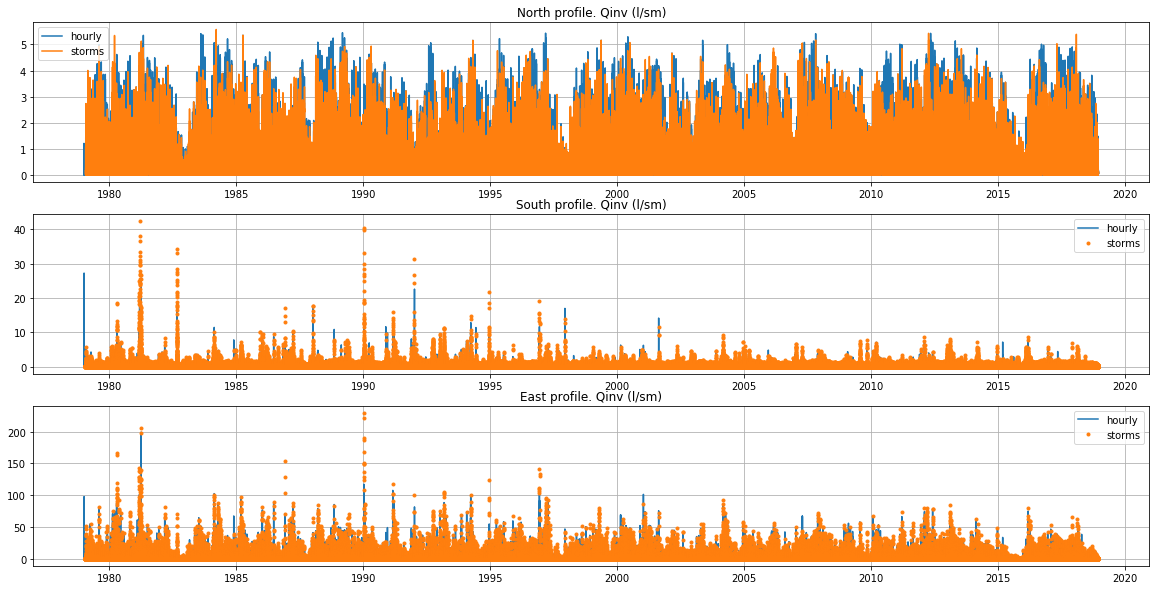

In [5]:
# plot 1 year

fig,axs = plt.subplots(3,1,figsize=(20,10))

axs[0].plot(hist_Q_wavesH_N.time, hist_Q_wavesH_N.Qinv.values, label='hourly')
axs[0].plot(hist_Q_storms_N.time, hist_Q_storms_N.Qinv.values, label='storms')
axs[0].legend()
axs[0].grid()
axs[0].title.set_text('North profile. Qinv (l/sm)')
#axs[0].set_xlim(datetime(2001,1,1),datetime(2002,1,1))
#axs[0].set_xlim(datetime(1996,1,1),datetime(2014,1,1))

axs[1].plot(hist_Q_wavesH_S.time, hist_Q_wavesH_S.Qinv.values, label='hourly')
axs[1].plot(hist_Q_storms_S.time, hist_Q_storms_S.Qinv.values, '.', label='storms')
axs[1].legend()
axs[1].grid()
axs[1].title.set_text('South profile. Qinv (l/sm)')
#axs[1].set_xlim(datetime(1996,1,1),datetime(2014,1,1))

axs[2].plot(hist_Q_wavesH_E.time, hist_Q_wavesH_E.Qinv.values, label='hourly')
axs[2].plot(hist_Q_storms_E.time, hist_Q_storms_E.Qinv.values, '.', label='storms')
axs[2].legend()
axs[2].grid()
axs[2].title.set_text('East profile. Qinv (l/sm)')
#axs[2].set_xlim(datetime(1996,1,1),datetime(2014,1,1))



Text(0.5, 1.0, 'South profile. Overtopping (l/s/m)')

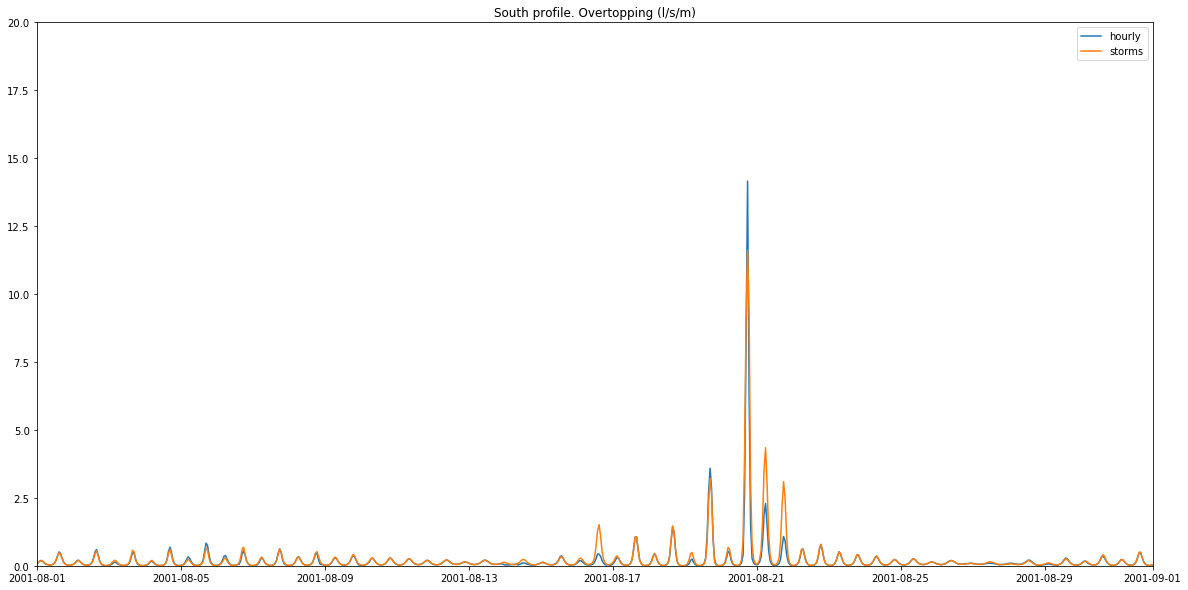

In [6]:
# plot South
plt.figure(figsize=(20,10))

plt.plot(hist_Q_wavesH_S.time, hist_Q_wavesH_S.Qinv.values, label='hourly')
plt.plot(hist_Q_storms_S.time, hist_Q_storms_S.Qinv.values, label='storms')
#plt.plot(hist_Q_storms_S.time, abs(hist_Q_wavesH_S.Qinv.values-hist_Q_storms_S.Qinv.values), '.r', label='dif')
#plt.xlim(datetime(1989,1,1),datetime(1991,1,1))
plt.xlim(datetime(2001,8,1),datetime(2001,9,1))
plt.ylim(0,20)
plt.legend()
plt.title('South profile. Overtopping (l/s/m)')

In [7]:

hist_Q_storms_N['Qinv']=(('time'), hist_Q_storms_N.Qinv.values)
hist_Q_storms_N = hist_Q_storms_N.reset_coords(names='Qinv', drop=False)

hist_Q_storms_S['Qinv']=(('time'), hist_Q_storms_S.Qinv.values)
hist_Q_storms_S = hist_Q_storms_S.reset_coords(names='Qinv', drop=False)

hist_Q_storms_E['Qinv']=(('time'), hist_Q_storms_E.Qinv.values)
hist_Q_storms_E = hist_Q_storms_E.reset_coords(names='Qinv', drop=False)


hist_Q_wavesH_N['Qinv']=(('time'), hist_Q_wavesH_N.Qinv.values)
hist_Q_wavesH_N = hist_Q_wavesH_N.reset_coords(names='Qinv', drop=False)

hist_Q_wavesH_S['Qinv']=(('time'), hist_Q_wavesH_S.Qinv.values)
hist_Q_wavesH_S = hist_Q_wavesH_S.reset_coords(names='Qinv', drop=False)

hist_Q_wavesH_E['Qinv']=(('time'), hist_Q_wavesH_E.Qinv.values)
hist_Q_wavesH_E = hist_Q_wavesH_E.reset_coords(names='Qinv', drop=False)

In [8]:
# Select coincident values
hist_Q_wavesH_N = hist_Q_wavesH_N.sel(time=hist_Q_storms_N.time)
hist_Q_wavesH_S = hist_Q_wavesH_S.sel(time=hist_Q_storms_S.time)
hist_Q_wavesH_E = hist_Q_wavesH_E.sel(time=hist_Q_storms_E.time)


#hist_Q_wavesH_N = hist_Q_wavesH_N.sel(time=slice(datetime(1996,1,1), datetime(2014,1,1)))
#hist_Q_wavesH_S = hist_Q_wavesH_S.sel(time=slice(datetime(1996,1,1), datetime(2014,1,1)))
#hist_Q_wavesH_E = hist_Q_wavesH_E.sel(time=slice(datetime(1996,1,1), datetime(2014,1,1)))
                                                                            
#hist_Q_storms_N = hist_Q_storms_N.sel(time=slice(datetime(1996,1,1), datetime(2014,1,1)))
#hist_Q_storms_S = hist_Q_storms_S.sel(time=slice(datetime(1996,1,1), datetime(2014,1,1)))
#hist_Q_storms_E = hist_Q_storms_E.sel(time=slice(datetime(1996,1,1), datetime(2014,1,1)))

Text(0.5, 1.0, 'East profile. Overtopping (l/s/m)')

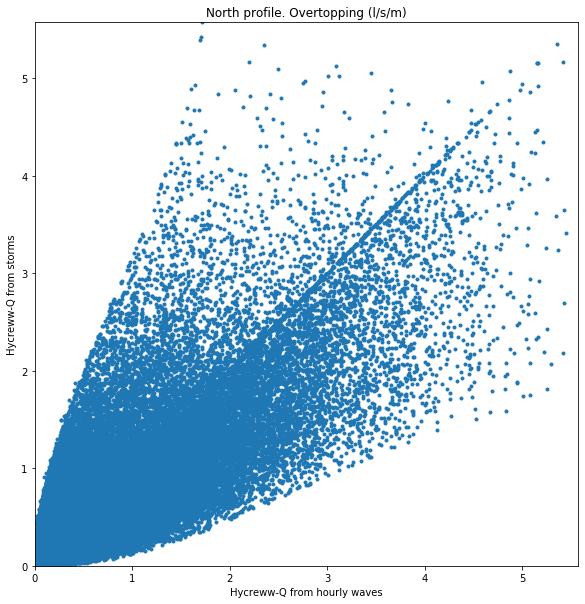

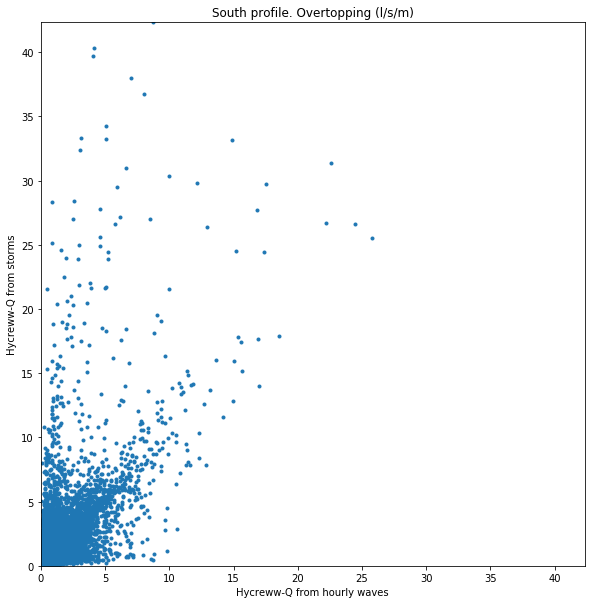

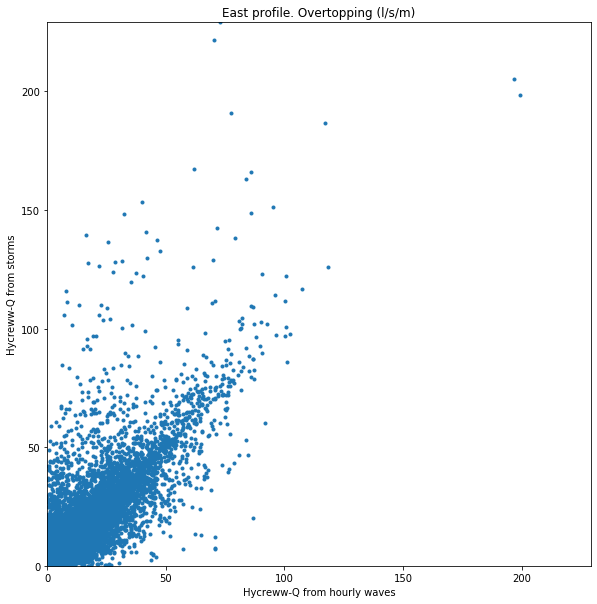

In [9]:


plt.figure(figsize=(20,10))
limits = np.max([np.nanmax(hist_Q_wavesH_N.Qinv.values), np.nanmax(hist_Q_storms_N.Qinv.values)])
plt.plot(hist_Q_wavesH_N.Qinv.values, hist_Q_storms_N.Qinv.values, '.')
plt.xlim(0, limits)
plt.ylim(0, limits)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Hycreww-Q from hourly waves')
plt.ylabel('Hycreww-Q from storms')
plt.title('North profile. Overtopping (l/s/m)')


plt.figure(figsize=(20,10))
limits = np.max([np.nanmax(hist_Q_wavesH_S.Qinv.values), np.nanmax(hist_Q_storms_S.Qinv.values)])
plt.plot(hist_Q_wavesH_S.Qinv.values, hist_Q_storms_S.Qinv.values, '.')
plt.xlim(0, limits)
plt.ylim(0, limits)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Hycreww-Q from hourly waves')
plt.ylabel('Hycreww-Q from storms')
plt.title('South profile. Overtopping (l/s/m)')

plt.figure(figsize=(20,10))
limits = np.max([np.nanmax(hist_Q_wavesH_E.Qinv.values), np.nanmax(hist_Q_storms_E.Qinv.values)])
plt.plot(hist_Q_wavesH_E.Qinv.values, hist_Q_storms_E.Qinv.values, '.')
plt.xlim(0, limits)
plt.ylim(0, limits)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Hycreww-Q from hourly waves')
plt.ylabel('Hycreww-Q from storms')
plt.title('East profile. Overtopping (l/s/m)')